# Exercise:
1. Biến đổi ảnh sao cho ảnh được chia thành hai nửa thông qua đường chéo, nửa đường chéo trên là RGB, nửa đường chéo dưới là ảnh xám
2. Biến đổi ảnh thành hai phần: phần hình tròn tâm ảnh là ảnh RGB, bên ngoài là ảnh xám
3. Thực hiện histogram equalization cho ảnh xám

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import gdown

In [35]:
gdown.download('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTU62Md2yC4lIg8Mt_ZUGEVBaoXR7apfYbWbQ&usqp=CAU', output = "img.png")
gdown.download('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTK8NmGj7MAdVTiY_aA0FE18yPYeJYrL7GL8Q&usqp=CAU', output = "dark.png")

Downloading...
From: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTU62Md2yC4lIg8Mt_ZUGEVBaoXR7apfYbWbQ&usqp=CAU
To: /content/img.png
100%|██████████| 6.24k/6.24k [00:00<00:00, 3.48MB/s]
Downloading...
From: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTK8NmGj7MAdVTiY_aA0FE18yPYeJYrL7GL8Q&usqp=CAU
To: /content/dark.png
100%|██████████| 4.69k/4.69k [00:00<00:00, 4.35MB/s]


'dark.png'

In [11]:
img_path = "img.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

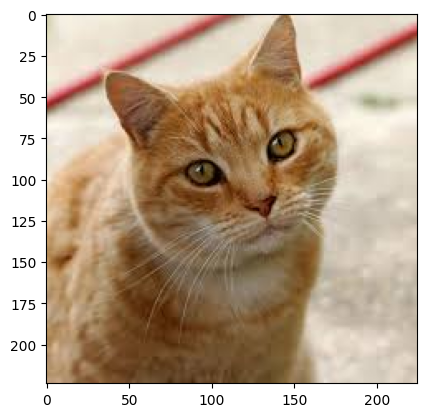

In [13]:
plt.imshow(img)
plt.show()


# Exercise 1: Biến đổi ảnh sao cho ảnh được chia thành hai nửa thông qua đường chéo, nửa đường chéo trên là RGB, nửa đường chéo dưới là ảnh xám

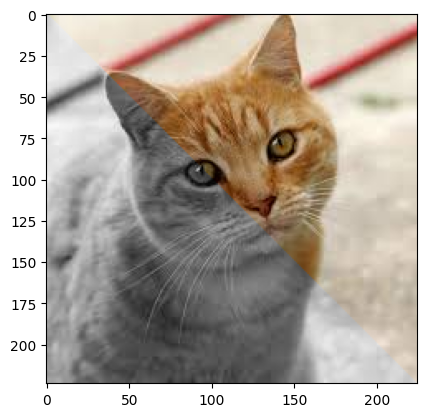

In [14]:
img_new = img.copy()

grey_channel = img[:,:,0] * 0.3 + img[:,:,1] * 0.59 + img[:,:,2] * 0.11
for x in range(img_new.shape[0]):
    for y in range(img_new.shape[1]):
        for z in range(img_new.shape[2]):
            if y < img_new.shape[1] / img_new.shape[0] * x:
                img_new[x][y][z] = grey_channel[x][y]

plt.imshow(img_new)
plt.show()







# Exercise 2: Biến đổi ảnh thành hai phần: phần hình tròn tâm ảnh là ảnh RGB, bên ngoài là ảnh xám

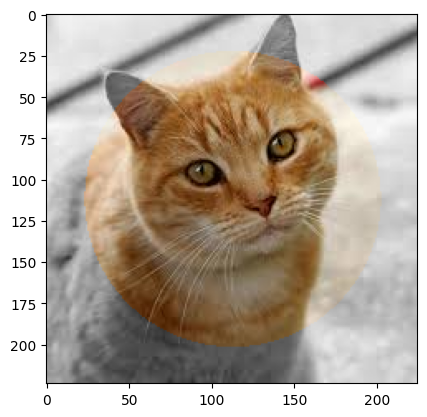

In [15]:

 

img_new2 = img.copy()
radius = 0.4 * min(img_new2.shape[0], img_new2.shape[1])


x_center = img_new2.shape[0] / 2
y_center = img_new2.shape[1] / 2

grey_channel = img[:,:,0] * 0.3 + img[:,:,1] * 0.59 + img[:,:,2] * 0.11
for x in range(img_new2.shape[0]):
    for y in range(img_new2.shape[1]):
        for z in range(img_new2.shape[2]):
            if np.sqrt((x - x_center) ** 2 + (y - y_center) ** 2) > radius:
                img_new2[x][y][z] = grey_channel[x][y]

plt.imshow(img_new2)
plt.show()







# Exercise 3: Thực hiện histogram equalization cho ảnh xám

## Khảo sát ảnh xám trước khi thực hiện cân bằng histogram

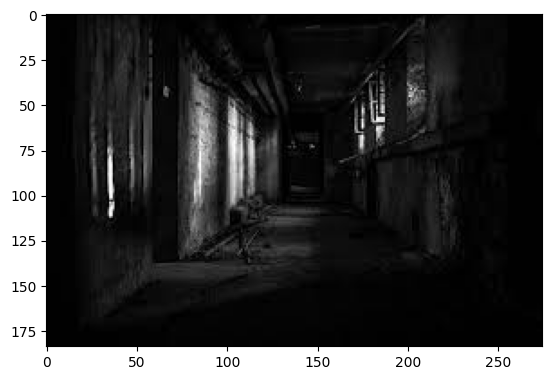

In [36]:
img_path = "dark.png"
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap='gray')
plt.show()



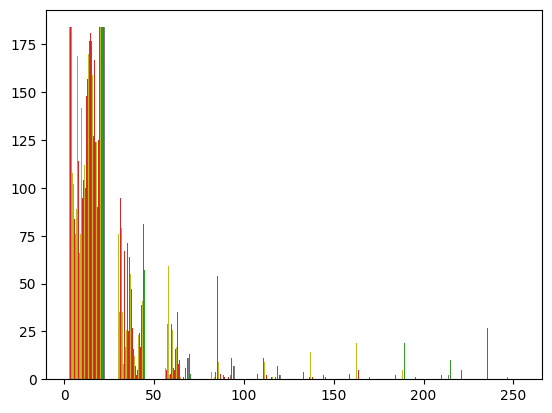

In [22]:
plt.hist(gray_img, range = (0, 256))
plt.show()


Quan sát, ta thấy ảnh khá "tối" !

## Tự hiện thực hàm để cân bằng histogram

In [23]:
def histogram_equalize(gray_img):
    hist_arr = np.histogram(gray_img, bins=256, range = (0, 256))[0]
    hist_arr = hist_arr / (gray_img.shape[0] * gray_img.shape[1])
    cum_hist_arr = np.cumsum(hist_arr)
    cum_uniform_arr = np.array(range(0, 256))  * (1 / 256)

    find_nearest_index = lambda c: np.abs(cum_uniform_arr - cum_hist_arr[c]).argmin()
    new_image = np.vectorize(find_nearest_index)(gray_img)
    return new_image







### Áp dụng hàm tự hiện thực cho ảnh xám vừa tải

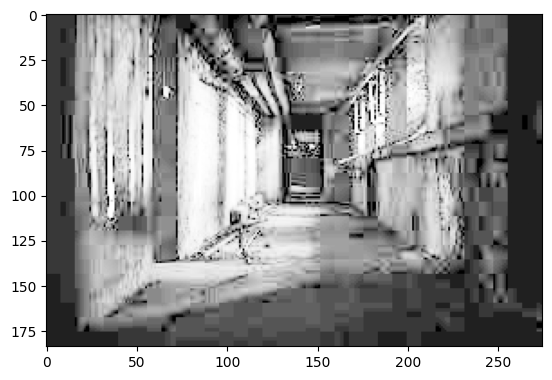

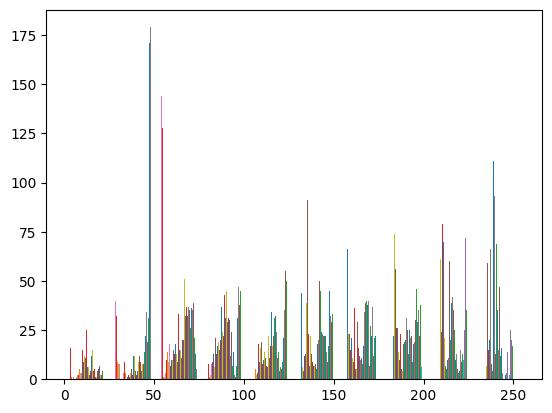

In [26]:

he_img = histogram_equalize(gray_img)
plt.imshow(he_img, cmap='gray')
plt.show()

plt.hist(he_img, range = (0, 256))
plt.show()

### Kiểm tra lại với hàm cv2.equalizeHist

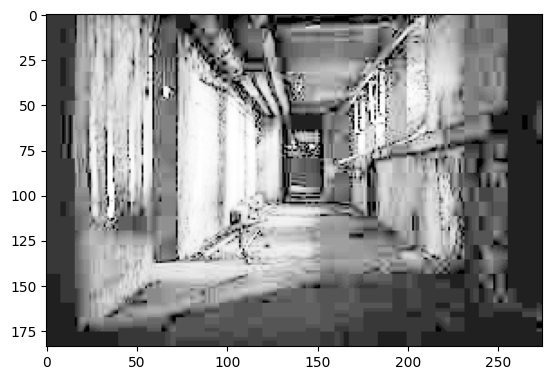

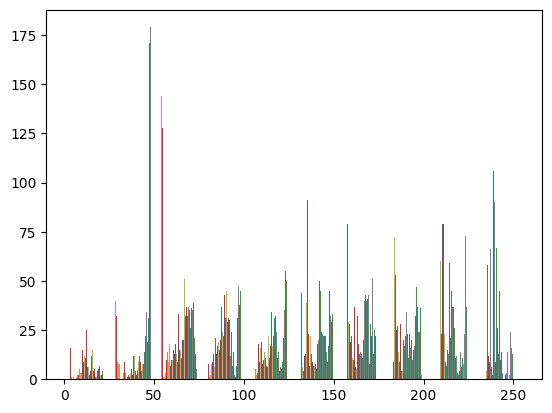

In [27]:

cv2_equalized = cv2.equalizeHist(gray_img)
plt.imshow(cv2_equalized, cmap='gray')
plt.show()
plt.hist(cv2_equalized, range = (0, 256))
plt.show()

### So sánh kết quả hàm tự hiện thực với cv2.equalizeHist (hình bên trên là kết quả của hàm tự hiện thực, hình bên dưới là nhờ áp dụng cv2.equalizeHist) 

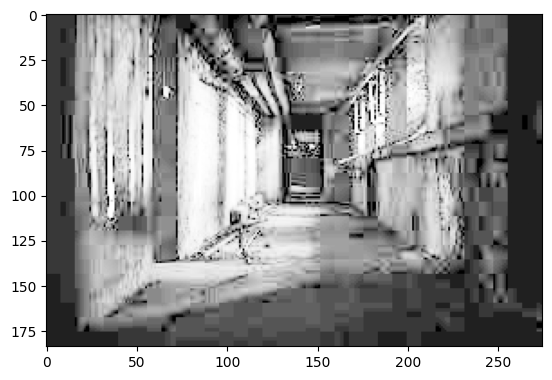

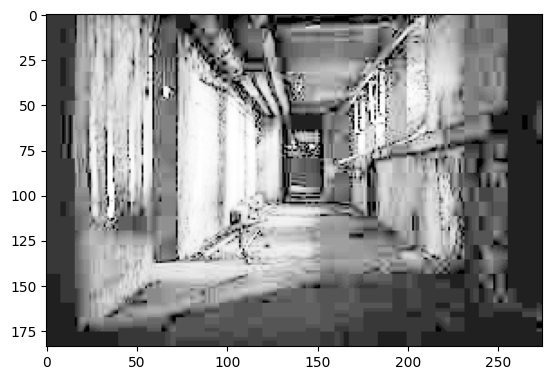

In [33]:
plt.imshow(he_img, cmap='gray')
plt.show()
plt.imshow(cv2_equalized, cmap='gray')
plt.show()


### Đối chiếu histogram (hình bên trên là kết quả của hàm tự hiện thực, hình bên dưới là nhờ áp dụng cv2.equalizeHist)

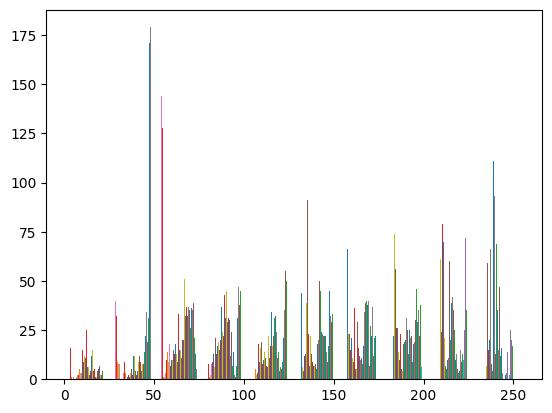

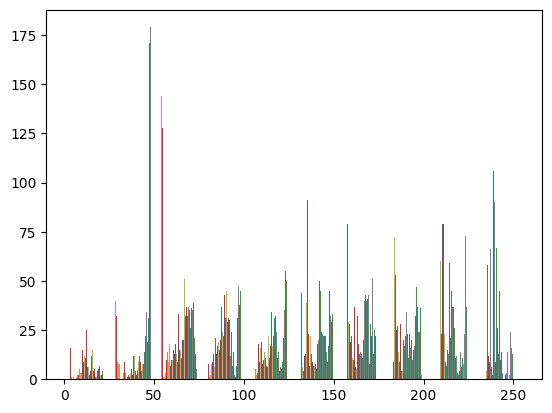

In [34]:
plt.hist(he_img, range = (0, 256))
plt.show()
plt.hist(cv2_equalized, range = (0, 256))
plt.show()